<a href="https://colab.research.google.com/github/Sairahulreddynallapareddy/Health-data-/blob/main/COUNTRY_SPECIFIC_DATA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

**TASK 1 : READ THE DATA FRAME**


In [35]:
# Step 1: Load the CSV file
file_path = "/content/age_standardised_countries.csv"
df = pd.read_csv(file_path)

In [36]:
df.head()

,Country/Region/World,ISO,Sex,Year,Mean systolic blood pressure (mmHg),Mean systolic blood pressure lower 95% uncertainty interval (mmHg),Mean systolic blood pressure upper 95% uncertainty interval (mmHg),Mean diastolic blood pressure (mmHg),Mean diastolic blood pressure lower 95% uncertainty interval (mmHg),Mean diastolic blood pressure upper 95% uncertainty interval (mmHg),Prevalence of raised blood pressure,Prevalence of raised blood pressure lower 95% uncertainty interval,Prevalence of raised blood pressure upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1975,121.078635,110.560019,131.280612,76.217903,69.432058,82.910254,0.251041,0.139465,0.389490
1,Afghanistan,AFG,Men,1976,121.213135,111.237480,130.972393,76.302382,69.841522,82.712827,0.252482,0.145232,0.385497
2,Afghanistan,AFG,Men,1977,121.352221,111.913929,130.796611,76.389730,70.243390,82.518096,0.254044,0.150297,0.380740
3,Afghanistan,AFG,Men,1978,121.493430,112.391051,130.595529,76.479429,70.680791,82.339212,0.255709,0.155271,0.376442
4,Afghanistan,AFG,Men,1979,121.636602,112.922056,130.367636,76.570570,70.991105,82.190582,0.257459,0.160139,0.372394


**TASK2** : REMOVE UNWANTED COLUMNS

In [37]:
# Step 2: Filter and rename columns
df = pd.read_csv(file_path)
columns_to_keep = [
    'Country/Region/World',
    'ISO',
    'Sex',
    'Year',
    'Mean systolic blood pressure (mmHg)',
    'Mean diastolic blood pressure (mmHg)'
]

**TASK 3 : RENAME THE COLUMNS**

In [38]:
df = pd.read_csv(file_path)
df = df[columns_to_keep]
df.rename(columns={
    'Country/Region/World': 'Country',
    'Mean systolic blood pressure (mmHg)': 'SBP',
    'Mean diastolic blood pressure (mmHg)': 'DBP'
}, inplace=True)

In [39]:
df.head()

,Country,ISO,Sex,Year,SBP,DBP
0,Afghanistan,AFG,Men,1975,121.078635,76.217903
1,Afghanistan,AFG,Men,1976,121.213135,76.302382
2,Afghanistan,AFG,Men,1977,121.352221,76.389730
3,Afghanistan,AFG,Men,1978,121.493430,76.479429
4,Afghanistan,AFG,Men,1979,121.636602,76.570570


**TASK 4 : TIME SERIES PLOT FOR 3 COUNTRIES**

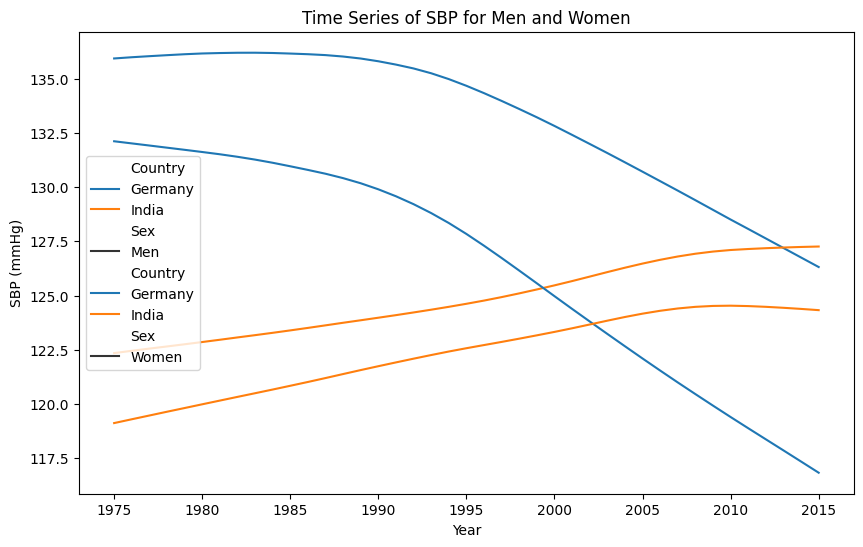

In [40]:
countries = ['India', 'United States', 'Germany']
subset = df[df['Country'].isin(countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=subset[subset['Sex'] == 'Men'], x='Year', y='SBP', hue='Country', style='Sex')
sns.lineplot(data=subset[subset['Sex'] == 'Women'], x='Year', y='SBP', hue='Country', style='Sex')
plt.title('Time Series of SBP for Men and Women')
plt.xlabel('Year')
plt.ylabel('SBP (mmHg)')
plt.legend()
plt.show()

**TASK 5 : TRENDLINE TO THE TIME SERIES**

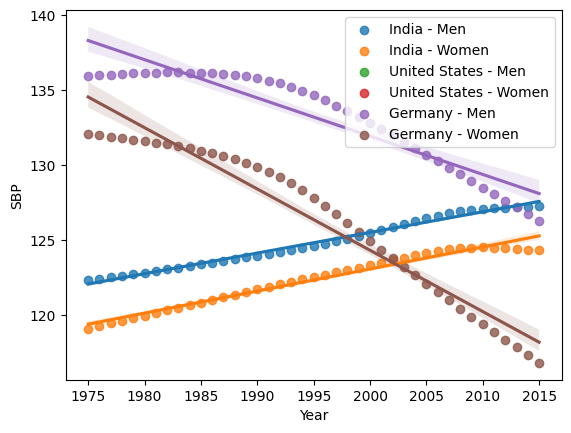

In [18]:
for country in countries:
    for sex in ['Men', 'Women']:
        temp = subset[(subset['Country'] == country) & (subset['Sex'] == sex)]
        sns.regplot(x=temp['Year'], y=temp['SBP'], label=f"{country} - {sex}")
plt.legend()
plt.show()

**TASK 6 : INTERACTIVE LINE PLOT**

In [19]:
fig = px.line(subset, x='Year', y='SBP', color='Country', line_dash='Sex', title='SBP Trends')
fig.show()

**TASK 7 : EXPORT MEAN SBP & DBP**

In [20]:
mean_bp = df.groupby('Country')[['SBP', 'DBP']].mean().reset_index()
mean_bp.to_csv("mean_blood_pressure.csv", index=False)
print("Mean blood pressure data saved to mean_blood_pressure.csv")

Mean blood pressure data saved to mean_blood_pressure.csv
